In [ ]:
!pip install plotly
!pip install cufflinks
!pip install textblob

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
from textblob import TextBlob
%matplotlib inline

In [34]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [35]:
df = pd.read_excel('./train.xlsx')
df.head()

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1


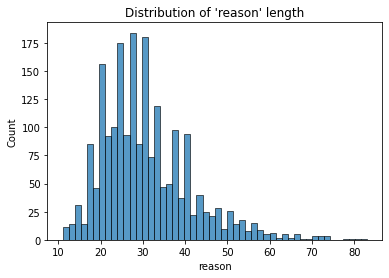

In [49]:
# Example distribution plot of the text length
sns.histplot(df['reason'].str.len(), bins=50)
plt.title("Distribution of 'reason' length")
plt.show()

In [32]:
df['text'].tolist()

['this is an amazing app for online classes!but',
 'very practical and easy to use',
 'this app is very good for video conferencing.',
 'i can not download this zoom app',
 'i am not able to download this app',
 'zoom is not working properly',
 'zoom is an excellent meeting app.',
 'i am not getting the virtual background option in the settings',
 'video quality is very poor',
 'i am unable to sign-in',
 'zoom does not update me anymore',
 'the app does not install',
 'best app for video calling and office meeting and online classes',
 'i can not connect to my meeting.',
 'my audio is not working please fix this problem',
 'use google meet instead.',
 'i found a problem it sometimes would not work password',
 'will not let me sign up.',
 'zoom is a very very bad app because there are',
 'i can not edit my profile picture',
 'because of this, i can not sign in to zoom.',
 'will not let me even install it',
 'this app will help me to study in lockdown',
 'it is nice and good but am havin

In [38]:
df_test = pd.read_excel('./evaluation.xlsx')
df_test.head()

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0
2,very helpful when and home working remotley,good app for work,0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0
4,one of my favorite apps,good for spending time,0


In [39]:
max_len = 0
for sentence in df_test['reason']:
    words = sentence.split()
    max_len = max(max_len,len(words))

print(max_len)

13


In [28]:
df_aug = pd.read_csv('./augmented.csv')
df_aug.head()

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1


In [4]:
df.isnull().sum()

text      0
reason    0
label     0
dtype: int64

### add negative samples

In [5]:
from negate import Negator
negator = Negator(use_transformers=True, fail_on_unsupported=True)

In [6]:
# Negate the text
negated_text = []
reason_text = []
for idx, text in enumerate(df['text']):
    try:
        negated_sentence = negator.negate_sentence(text, prefer_contractions=False)
        negated_text.append(negated_sentence)
        reason_text.append(df.iloc[idx,1])
    except:
        continue
df_negated = pd.DataFrame({'text': negated_text, 'reason': reason_text, 'label':0})


In [7]:
df_negated.head()

,text,reason,label
0,This is not an amazing app for online classes!but,good app for conducting online classes,0
1,Very practical and easy to do not use,app is user-friendly,0
2,This app is not very good for video conferencing.,good for video conferencing,0
3,I can download this zoom app,unable to download zoom app,0
4,I am able to download this app,want to download the app,0


In [8]:
df = df.append(df_negated, ignore_index=True)

C:\Users\dahiy_uokx4\AppData\Local\Temp\ipykernel_12852\1047664609.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [14]:
df.to_csv('augmented.csv',index=False)

In [50]:
df['text_polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['reason_polarity'] = df['reason'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['text_len'] = df['text'].apply(lambda x: len(x))
df['reason_len'] = df['reason'].apply(lambda x: len(x))

df['text_count'] = df['text'].apply(lambda x: len(x.split()))
df['reason_count'] = df['reason'].apply(lambda x: len(x.split()))

In [52]:
def avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len += len(word)
    return word_len/len(words)

In [53]:
df['text_avg_word'] = df['text'].apply(lambda x: avg_word_len(x))
df['reason_avg_word'] = df['reason'].apply(lambda x: avg_word_len(x))

In [54]:
df.head()

,text,reason,label,text_polarity,reason_polarity,text_len,reason_len,text_count,reason_count,text_avg_word,reason_avg_word
0,this is an amazing app for online classes!but,good app for conducting online classes,1,0.600000,0.7,45,38,8,6,4.750000,5.5
1,very practical and easy to use,app is user-friendly,1,0.316667,0.0,30,20,6,3,4.166667,6.0
2,this app is very good for video conferencing.,good for video conferencing,1,0.910000,0.7,45,27,8,4,4.750000,6.0
3,i can not download this zoom app,unable to download zoom app,1,0.000000,-0.5,32,27,7,5,3.714286,4.6
4,i am not able to download this app,want to download the app,1,-0.250000,0.0,34,24,8,5,3.375000,4.0


In [10]:
df.dtypes

text      object
reason    object
label      int64
dtype: object

In [ ]:
df['reason_avg_word'].iplot(kind = 'hist')

### distribution of unigram, bigram and trigram

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
def get_top_ngram(x, n, gram):
    vec = CountVectorizer(ngram_range=(gram,gram),stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [42]:
unigrams = get_top_ngram(df['text'], 20, gram=1)

In [43]:
unigrams

[('app', 421),
 ('zoom', 200),
 ('does', 155),
 ('good', 126),
 ('meeting', 120),
 ('screen', 114),
 ('video', 106),
 ('background', 95),
 ('time', 92),
 ('phone', 90),
 ('use', 83),
 ('work', 83),
 ('quality', 80),
 ('bad', 75),
 ('android', 72),
 ('application', 71),
 ('update', 64),
 ('audio', 63),
 ('add', 63),
 ('option', 62)]

In [44]:
bigrams = get_top_ngram(df['text'], 20, gram=2)

In [45]:
bigrams

[('does work', 57),
 ('virtual background', 22),
 ('app good', 17),
 ('zoom app', 17),
 ('app does', 15),
 ('zoom meeting', 15),
 ('long time', 15),
 ('video quality', 14),
 ('cell phone', 14),
 ('good app', 14),
 ('best app', 13),
 ('does let', 13),
 ('worst app', 12),
 ('takes long', 12),
 ('online classes', 11),
 ('does allow', 11),
 ('open app', 10),
 ('bad app', 9),
 ('profile picture', 9),
 ('easy use', 8)]

In [46]:
trigrams = get_top_ngram(df['text'], 20, gram=3)

In [47]:
trigrams

[('takes long time', 10),
 ('does work properly', 5),
 ('virtual background option', 4),
 ('time open app', 4),
 ('app does work', 4),
 ('app online classes', 3),
 ('able download app', 3),
 ('video quality poor', 3),
 ('does support arabic', 3),
 ('support arabic language', 3),
 ('zoom cloud meeting', 3),
 ('screen goes black', 3),
 ('high speed internet', 3),
 ('sound does work', 3),
 ('application does work', 3),
 ('best app video', 2),
 ('meeting online classes', 2),
 ('able set background', 2),
 ('install app phone', 2),
 ('change background using', 2)]

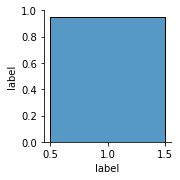

In [48]:
sns.pairplot(df)

## baseline approach

In [11]:
import torch
from transformers import BertTokenizer, BertModel

print('importing tokenizer')
# Tokenization
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')

importing tokenizer


KeyboardInterrupt: 

In [ ]:

text = "This is a sample text."
reason = "To test the model."
text_tokens = tokenizer.encode(text, add_special_tokens=False)
reason_tokens = tokenizer.encode(reason, add_special_tokens=False)

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
# Encoding
model = BertModel.from_pretrained('bert-base-uncased')
text_tokens_tensor = torch.tensor([text_tokens])
reason_tokens_tensor = torch.tensor([reason_tokens])
text_embeddings = model(text_tokens_tensor)[0]
reason_embeddings = model(reason_tokens_tensor)[0]

In [ ]:
# Pooling
text_pooled = torch.mean(text_embeddings, dim=1)
reason_pooled = torch.mean(reason_embeddings, dim=1)

In [ ]:
# Concatenation
joint_representation = torch.cat((text_pooled, reason_pooled), dim=1)

# Classification
classification_layer = torch.nn.Linear(joint_representation.shape[1], 1)
output = classification_layer(joint_representation)

In [ ]:
output

In [ ]:
num_epochs = 1

In [ ]:
# Training
optimizer = torch.optim.Adam(classification_layer.parameters(), lr=1e-4)
loss_fn = torch.nn.BCEWithLogitsLoss()
for epoch in range(num_epochs):
    for batch in data_loader:
        text_batch, reason_batch, label_batch = batch
        text_tokens_batch = tokenizer.batch_encode_plus(text_batch, add_special_tokens=False)['input_ids']
        reason_tokens_batch = tokenizer.batch_encode_plus(reason_batch, add_special_tokens=False)['input_ids']
        text_embeddings_batch = model(torch.tensor(text_tokens_batch))[0]
        reason_embeddings_batch = model(torch.tensor(reason_tokens_batch))[0]
        text_pooled_batch = torch.mean(text_embeddings_batch, dim=1)
        reason_pooled_batch = torch.mean(reason_embeddings_batch, dim=1)
        joint_representation_batch = torch.cat((text_pooled_batch, reason_pooled_batch), dim=1)
        output_batch = classification_layer(joint_representation_batch)
        loss = loss_fn(output_batch.squeeze(), label_batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification